In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
from pathlib import Path

In [2]:
ROOT_DIR = os.path.dirname(
os.path.dirname(str(Path(os.path.abspath('')).absolute())))

# Load Model

In [3]:
TARGET_NAME = "ref_energy/"
ENCODING_NAME = "atomic/"
MODEL_NAME = "random_forest_model.pkl"

In [4]:
MODELS_DIR = os.path.join(
    str(Path(os.path.abspath('')).parent.parent.absolute()), "models", TARGET_NAME, ENCODING_NAME
)

In [5]:
with open(MODELS_DIR + MODEL_NAME, 'rb') as file:
    model = pickle.load(file)

# Load Data Sets

In [6]:
X_TRAIN_NAME = "X_train.csv"
y_TRAIN_NAME = "y_train.csv"

In [7]:
X_train = pd.read_csv(os.path.join(MODELS_DIR, "datasets", X_TRAIN_NAME), index_col=0)
y_train = pd.read_csv(os.path.join(MODELS_DIR, "datasets", y_TRAIN_NAME), index_col=0)

In [8]:
X_TEST_NAME = "X_Structure gen..csv"
y_TEST_NAME = "y_Structure gen..csv"

In [9]:
X_test = pd.read_csv(MODELS_DIR + "/datasets/" + X_TEST_NAME, index_col=0)
y_test = pd.read_csv(MODELS_DIR + "/datasets/" + y_TEST_NAME, index_col=0)

In [10]:
X_test.describe()

,Ag,Al,Ar,As,Au,B,Ba,Be,Bi,Br,...,Tl,Tm,V,W,Xe,Y,Yb,Zn,Zr,total_atoms
count,193.000000,193.000000,193.0,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.0,193.000000,193.000000,193.000000,193.000000,193.0
mean,0.031088,0.015544,0.0,0.007772,0.010363,0.007772,0.007772,0.005181,0.018135,0.002591,...,0.015544,0.010363,0.007772,0.005181,0.0,0.012953,0.018135,0.023316,0.015544,2.0
std,0.121052,0.087004,0.0,0.062012,0.071417,0.062012,0.062012,0.050766,0.093723,0.035991,...,0.087004,0.071417,0.062012,0.050766,0.0,0.079635,0.093723,0.105699,0.087004,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0
max,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,2.0


In [11]:
pred_trees = np.array([estimator.predict(X_train) for estimator in model.estimators_]).T

In [12]:
np.allclose(np.mean(pred_trees, axis=1), model.predict(X_train))

True

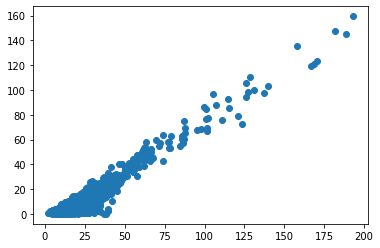

In [13]:
x = np.std(pred_trees, axis=1)
y = np.abs(model.predict(X_train) - y_train.values.squeeze())
plt.scatter(x, y)